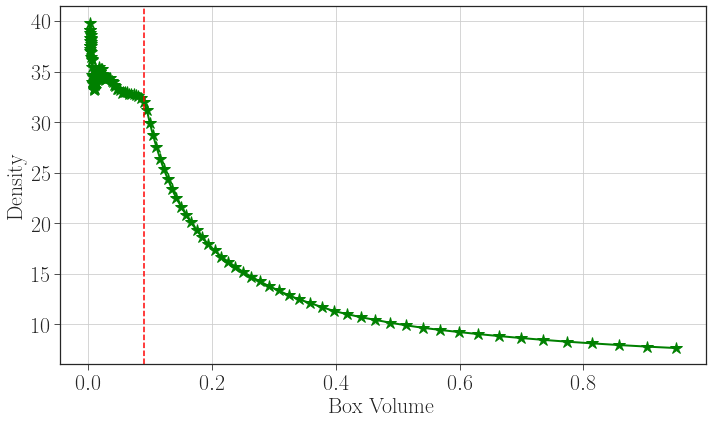

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from codebase.prim_dens import PRIMdens
new_data = pd.read_csv("tmp.csv")

# Create an instance of the latest PRIMdens class and fit it to the new_data
prim_dens_model_latest = PRIMdens(new_data.values)
prim_dens_model_latest.fit()

# Extract densities and corresponding box volumes for plotting
densities_latest = prim_dens_model_latest.densities_
volumes_latest = [np.prod(box[1] - box[0]) for box in prim_dens_model_latest.boxes_]

# Set up the plotting parameters
plt.style.use('seaborn-ticks')
plt.rc('text', usetex=True)
font_size = 22
params = {
    'backend': 'ps',
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'text.usetex': True,
    'font.family': 'serif'
}
plt.rcParams.update(params)

# Plotting the densities 
plt.figure(figsize=(10, 6))
plt.plot(volumes_latest, [density/1000 for density in densities_latest], '-*', color='green', linewidth=2, markersize=12)
plt.axvline(x=0.09, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Box Volume", fontsize=font_size)
plt.ylabel("Density", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)
plt.tight_layout()
plt.savefig('output/accuracy/interactive.pdf')
plt.show()

